In [1]:
import warnings
warnings.filterwarnings("ignore")

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import QFT, IntegerComparator
from qiskit.quantum_info import Statevector
from U_Power import build_U_power_oracle 
import numpy as np
from numpy import pi
from qiskit.visualization import plot_histogram, array_to_latex

In [2]:
theta_matrix = np.array([
    [0, pi/16, pi/32, pi/8],  # distances from city 0
    [pi/8, 0, pi/16, pi/32],  # distances from city 1
    [pi/16, pi/8, 0, pi/16],  # distances from city 2
    [pi/16, pi/32, pi/8, 0]   # distances from city 3
])

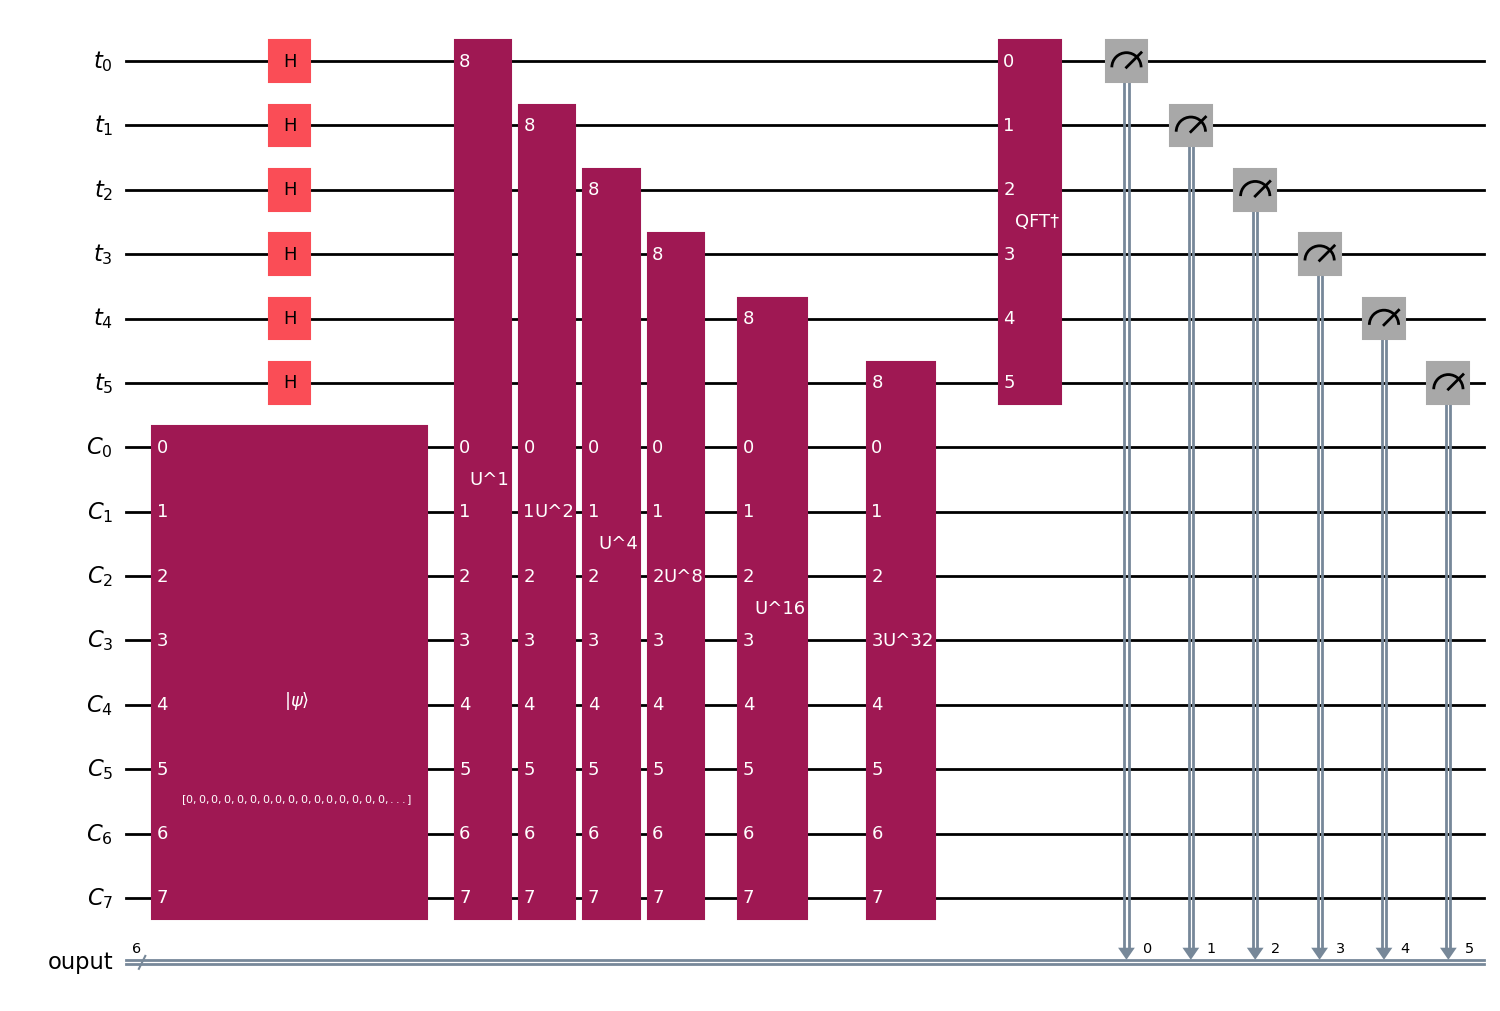

In [3]:
# Quantum Registers
t=6
precision = QuantumRegister(t, 't')                # Precision qubits for QPEflag = QuantumRegister(1, 'flag')                  # Flag for marking solutions
cycle = QuantumRegister(8, 'C')                    # Cycle/tour register
cr = ClassicalRegister(t,'ouput')  



circuit = QuantumCircuit(precision, cycle, cr, name="QPE")

# Define 8-bit states
states = ['11000110', '10001101', '11001001']
num_qubits = 8
# Create statevector with 2^8 = 256 entries
state_vector = np.zeros(2**num_qubits, dtype=complex)

# Set amplitude 1/sqrt(3) for each target state
amp = 1 / np.sqrt(3)
for bitstring in states:
    index = int(bitstring, 2)
    state_vector[index] = amp

# Initialize circuit
circuit.h(precision)
circuit.initialize(state_vector, range(6, 6+8))
    # Step 1: Apply superpositions

#circuit.h(cycle)
    # Step 2: Apply controlled-U^2^k gates
for k in range(6):
    U_power = build_U_power_oracle(theta_matrix, 2 ** k)
    circuit.append(U_power, [*cycle, precision[k]])
# Step 3: Apply inverse QFT
iqft = QFT(t, inverse=True, do_swaps=True).to_gate(label="QFT†")
circuit.append(iqft, precision)
circuit.measure(precision, cr)
# Step 4: Apply threshold comparator
display(circuit.draw('mpl'))


Result(backend_name='qasm_simulator', backend_version='0.14.2', qobj_id='', job_id='21beb109-ed0c-424d-87f2-8b45dcda1b86', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x6': 308, '0x9': 340, '0x3': 376}), header=QobjExperimentHeader(creg_sizes=[['ouput', 6]], global_phase=0.0, memory_slots=6, n_qubits=14, name='QPE', qreg_sizes=[['t', 6], ['C', 8]], metadata={}), status=DONE, seed_simulator=602601680, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 14, 'num_clbits': 6, 'time_taken': 35.6469107, 'input_qubit_map': [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10], [11, 11], [12, 12], [13, 13]], 'max_memory_mb': 8067, 'measure_sampling': False, 'noise': 'ideal', 'parallel_shots': 8, 'parallel_state_update'

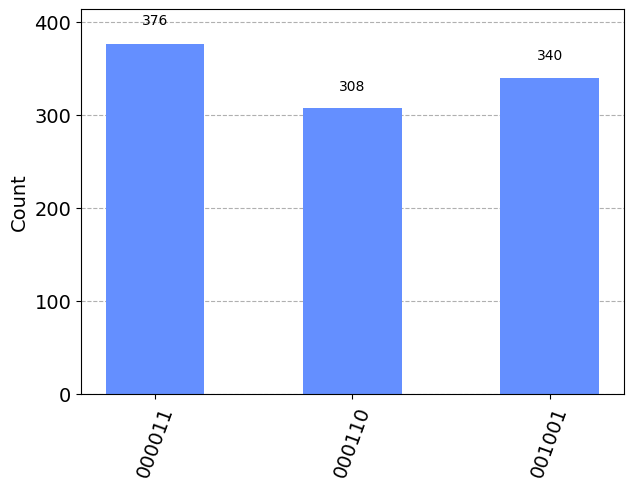

In [4]:
simulator = Aer.get_backend('qasm_simulator')
qc_1 = transpile(circuit, simulator)
result = simulator.run(qc_1).result()
counts1 = result.get_counts(qc_1)
print(result)
plot_histogram(counts1)

In [5]:
# with open("complex_matrix.csv", "w") as f:
#     for row in unitary_matrix:
#         f.write(",".join(str(val) for val in row) + "\n")

In [6]:
from qiskit.opflow import PauliSumOp, Z

num_qubits = 6
H = sum(PauliSumOp.from_list([(f"{'I' * (num_qubits - 1 - i)}Z{'I' * i}", 1.0)]) for i in range(num_qubits))


ModuleNotFoundError: No module named 'qiskit.opflow'